### SVM

In [1]:
# SVM is an ML model which tries to separate two different classes with a hyperplane.
# SVMs again are naturally binary classifiers

# Data points of 'd' dimensions are separated by (d-1) dimensional hyperplane using the method 
# "Maximum-Margin Hyperplane"

# There can be many hyperplanes which separate the two classes, but maximum-margin hyperplane will have the highest
# distances from the nearest points of each classes

# Assuming the class labels as 1 and -1, the nearest points of each classes will go through the planes parallel 
# to max-margin hyperplane wx - b = 0, will be wx-b=1 and wx-b=-1.

# Support Vector Machines are generalized linear models which means they are trying to find a linear hyperplane
# which can separate the data. 

# SVMs have been modified to find non-linear hyperplanes between the data.

# So, how do we do that?
# SVMs are able to do non-linear classifications, by actually mapping the current 'd' dimensional data to 
# infinite or 'k' dimensional data space where k > d. After the mapping, SVM tries to find a linear hyperplane 
# which can classifiy the data in new 'k' dimensional data space.

# Always remember that finding a hyperplane which can correctly separate different classses of data will be much 
# easier in high dimensional space and there are possibility of infinite hyperplanes.

# I am not saying that will be computation friendly, but there is much probaility of that happeninig and your
# degree of freedom is more.
# So, linear hyperplane in 'k' dimension will actually be non-linear in 'd' dimensional space. That's how we achieve
# non-linear classification.

# How do we map the points to higher dimension space?
# We achieve this using a method called kernel trick. Kernel function is a function which will map the lower 
# dimensional points to a higher dimensional space in such a way that we will be able to find a hyperplane in 'k' 
# dimensional space which can easily separate the data. 

# Come let me make it a bit clearer by a small example

In [2]:
# We have data like below which can not be seprated with a linear hyperplane.
# But if you see properly, we can actually make circle in 2-D which will be able to do a great job.

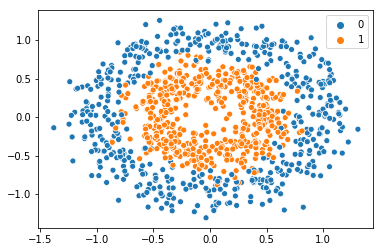

In [3]:
from sklearn.datasets import make_circles
import seaborn as sns
X, y = make_circles(n_samples=1000, shuffle=True, noise= .15, factor = .5)
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [4]:
# Let's first see whether an SVM of with linear lernel would be able to separate them well or not.

In [5]:
from sklearn.svm import LinearSVC, SVC
model = LinearSVC()
model.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

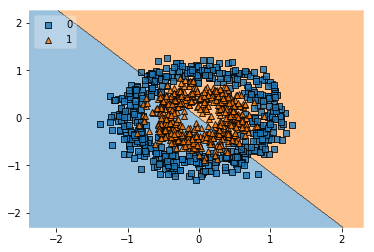

In [6]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model, legend=2)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y, y_pred=model.predict(X))

0.494

In [8]:
# linear kernel, which doesn't do the mapping of the data to higher dimensional space try to do linear separation
# But we already know that the data is not linearly separable

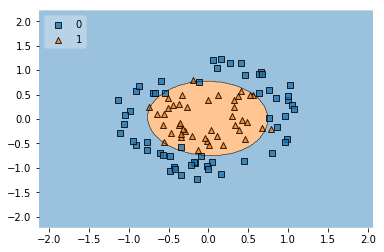

In [9]:
# Now lets work with non-linear SVMs or SVM with non-linear kernel functions
from sklearn.svm import SVC
model = SVC(gamma="scale")
model.fit(X, y)
# To visualize the decision boundaries properly I have take only 50 points, you can plot for full data also.
plot_decision_regions(X[:100, :], y[:100], clf=model, legend=2)

In [10]:
# SVC was able to separate the points because kernel used here is radial basis function which can find the 
# the non-linear planes easily. RBF is default for SVC in sklearn.

# Now, there are other kernels also, lets see how they perform for this data.

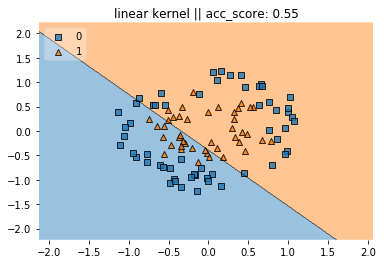

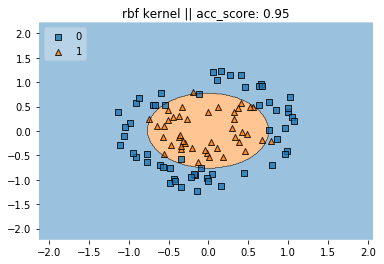

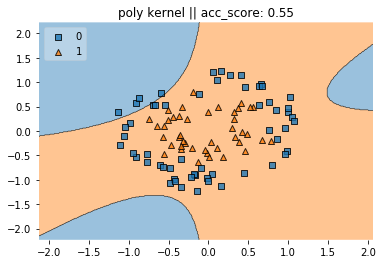

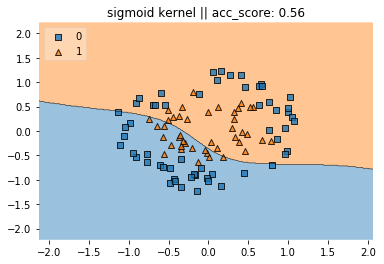

In [11]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 10))
import warnings 
warnings.filterwarnings("ignore")
# Different types of kernel supported by sklearn
# You can have your custom kernel also
kernel_types=["linear", "rbf", "poly", "sigmoid"]
fig, ax = plt.subplots()
for i in range(0, 4):
    model = SVC(kernel=kernel_types[i])
    model.fit(X, y)
    y_pred = model.predict(X)
    acc_score = accuracy_score(y_true=y, y_pred=y_pred)
    plt.title(kernel_types[i] + " kernel || acc_score: " + str(round(acc_score, 2)))
    plot_decision_regions(X[:100, :], y[:100], clf=model, legend=2)
    plt.show()

In [12]:
# We can see for different kernels, the decision boundary is different because of the different kernel functions.

# Each of them try to find the best hyperplane in high dimension which can properly separate the dataset.

# Also, observe that rbf is able to do the best in terms of separating the data. How is it able to do it ? What else
# it can do ? You can read about it in net. That would deifinitely be good information in underastanding the kernels
# in general.

### Feature Engineering is what SVM Kernel is

In [13]:
# Rather than using the actual kernel parameter, we can use Linear SVM wiht one featurization
# We add another dimension to the data which is basically z = x^2 + y^2
# We came up with this fucntion as our data is of circle kind. 
# Lets see whether Linear SVC is actually able to improve the score with this extra feature.

In [14]:
# Adding new dimension to our data
import numpy as np
new_dim = ((X[:, 0]*X[:, 0]) + (X[:, 1]*X[:, 1])).reshape(-1, 1)
X_t = np.hstack((X, new_dim))
y_t = y

In [15]:
# We have three dimesions now
X_t.shape

(1000, 3)

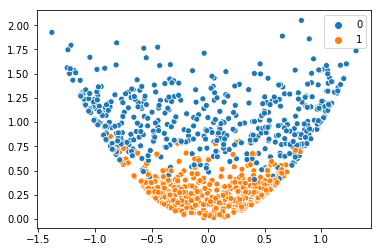

In [16]:
# Plot scatter plot with third dimension as y-axis
# We can observe this is more like a parabola and we can actually make a line parallel to x-axis which can 
# separate the data.
# Now, we can linearly separate the data
sns.scatterplot(X_t[:, 0],X_t[:, 2], hue=y_t) 

In [17]:
# We can visualize this in 3-d in a better way.
import plotly.express as px
fig = px.scatter_3d(x=X_t[:, 0], y=X_t[:, 1], z=X_t[:, 2],color=y_t)
fig

In [18]:
# Let' see whether in actual, our model is able to perform well with this new dimension
model = LinearSVC()
model.fit(X_t, y_t)
y_pred = model.predict(X_t)
accuracy_score(y_true=y, y_pred=y_pred)

0.948

In [19]:
# We can see that now our model fitted to the data very well.
# Let's try to plot the hyperplane also in 3-d.

In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go

X_t = np.hstack((X_t, y_t.reshape(-1, 1)))

z = lambda x,y: (-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y) / model.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)
                  
fig = go.FigureWidget()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale='Greys', showscale=False)
fig.add_scatter3d(x=X_t[y_t==0, 0], y=X_t[y_t==0, 1], z=X_t[y_t==0, 2], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=X_t[y_t==1, 0], y=X_t[y_t==1, 1], z=X_t[y_t==1, 2], mode='markers', marker={'color': 'yellow'})
fig.show()

In [21]:
# As we can see, our model is able to distinguish between the classes and find a hyperplane which can separate the 
# the data points.

In [22]:
# FOR THIS KERNEL, I WILL TAKE A STOP HERE.
# IF YOU HAVE ANY THOUGHTS, PLEASE LET ME KNOW IN THE COMMENTS. IT WILL HELP ME IMPROVE.